# Домашнее задание 2. Нейронные сети
## Мамонтов С. ИУ8-85

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [1]:
import numpy as np
import sklearn.model_selection as learn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test

In [6]:
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_red = pd.read_csv("winequality-red.csv", sep=";")
df = pd.concat([df_red, df_white],ignore_index=True)
assert df.size == df_red.size + df_white.size
print(df.count())
df_data = df.drop(['quality'], 1)
df_result = df[['quality']]
train_data, test_data, train_result, test_result = learn.train_test_split(df_data, df_result, train_size=0.8, random_state=221)
print(train_data, test_data)
tensor_train_data = torch.tensor(train_data.to_numpy())
tensor_train_result = torch.tensor(train_result.to_numpy())
tensor_test_data = torch.tensor(test_data.to_numpy())
tensor_test_result = torch.tensor(test_result.to_numpy())


fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1091            7.9             0.340         0.42            2.00      0.086   
6083            5.8             0.555         0.26            4.50      0.053   
5276            6.9             0.580         0.58            8.20      0.032   
1013            7.5             0.710         0.00            1.60      0.092   
3660            6.7             0.230         0.33            1.80      0.036   
...             ...               ...          ...             ...        ...   
3977            9.4             0.230         0.56           16.45      

## 1.2 По необходимости проведите преодбработку/нормализацию данных

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [3]:
buf_loss_test = []
buf_loss_train = []

def train_function(loss_train_buffer, loss_test_buffer, _model, _optimizer = torch.optim.Adam, _loss_function = torch.nn.MSELoss(), epochs_number = 500):
    if _optimizer == torch.optim.Adam :
            _optimizer = _optimizer(_model.parameters(), lr = 0.1)
    for epoch in range(epochs_number):
        b_x = Variable(tensor_train_data)
        b_y = Variable(tensor_train_result)
        _model.train()
        output = _model.forward(b_x.float())
        loss = torch.sqrt(_loss_function(output, b_y.float()))
        _optimizer.zero_grad()
        loss.backward()
        _optimizer.step()
        if (epoch + 1) % 50 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs_number, loss.item()))
    loss_train_buffer.append(loss.item())

    b_x_test = Variable(tensor_test_data)
    b_y_test = Variable(tensor_test_result)
    _model.train(mode = False)
    output = _model.forward(b_x_test.float())
    loss = torch.sqrt(_loss_function(output, b_y_test.float()))
    print(loss)
    loss_test_buffer.append(loss.item())
    return

In [4]:
print("First model")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,1)))

First model
Epoch [50/500], Loss: 0.8198
Epoch [100/500], Loss: 0.9025
Epoch [150/500], Loss: 0.8961
Epoch [200/500], Loss: 0.8930
Epoch [250/500], Loss: 0.8927
Epoch [300/500], Loss: 0.8921
Epoch [350/500], Loss: 0.8917
Epoch [400/500], Loss: 0.8914
Epoch [450/500], Loss: 0.8912
Epoch [500/500], Loss: 0.8911
tensor(0.8741, grad_fn=<SqrtBackward0>)


In [5]:
print("Second model")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(6,1)))

Second model
Epoch [50/500], Loss: 0.8589
Epoch [100/500], Loss: 0.7662
Epoch [150/500], Loss: 0.7461
Epoch [200/500], Loss: 0.7461
Epoch [250/500], Loss: 0.7534
Epoch [300/500], Loss: 0.7405
Epoch [350/500], Loss: 0.7387
Epoch [400/500], Loss: 0.7678
Epoch [450/500], Loss: 0.7394
Epoch [500/500], Loss: 0.7595
tensor(0.7517, grad_fn=<SqrtBackward0>)


In [6]:
print("Third model")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,7),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(7,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(3,1)))

Third model
Epoch [50/500], Loss: 0.8217
Epoch [100/500], Loss: 0.7712
Epoch [150/500], Loss: 0.7511
Epoch [200/500], Loss: 0.7458
Epoch [250/500], Loss: 0.7790
Epoch [300/500], Loss: 0.7434
Epoch [350/500], Loss: 0.7337
Epoch [400/500], Loss: 0.7449
Epoch [450/500], Loss: 0.7350
Epoch [500/500], Loss: 0.7715
tensor(0.7598, grad_fn=<SqrtBackward0>)


In [7]:
print("Fourth model")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(3,1)))

Fourth model
Epoch [50/500], Loss: 1.4444
Epoch [100/500], Loss: 0.8778
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


Train: 	 [0.8910624384880066, 0.7595293521881104, 0.7715456485748291, 0.8755161166191101]
Test: 	 [0.8740989565849304, 0.7516563534736633, 0.759795069694519, 0.8638487458229065]


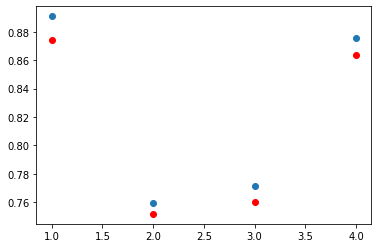

In [8]:
print("Train: \t",buf_loss_train)
print("Test: \t",buf_loss_test)

x = np.linspace(1,4,4)
plt.figure(1)
plt.scatter(x,buf_loss_test, color = "red")
plt.scatter(x,buf_loss_train)
plt.show()

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

Раз 4-х слойные сети показали самые лучшие результаты, то будем использовать их

In [9]:
buf_loss_test.clear()
buf_loss_train.clear()

In [10]:
print("ReLU")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(3,1)))

ReLU
Epoch [50/500], Loss: 0.8293
Epoch [100/500], Loss: 0.7865
Epoch [150/500], Loss: 0.8001
Epoch [200/500], Loss: 0.7885
Epoch [250/500], Loss: 0.7432
Epoch [300/500], Loss: 0.7408
Epoch [350/500], Loss: 0.7397
Epoch [400/500], Loss: 0.7410
Epoch [450/500], Loss: 0.7406
Epoch [500/500], Loss: 0.7494
tensor(0.7414, grad_fn=<SqrtBackward0>)


In [11]:
print("Sigmoid")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.Sigmoid(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.Sigmoid(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.Sigmoid(),
                                  torch.nn.Linear(3,1)))

Sigmoid
Epoch [50/500], Loss: 0.8763
Epoch [100/500], Loss: 0.8758
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


In [12]:
print("TanH")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.Tanh(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.Tanh(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.Tanh(),
                                  torch.nn.Linear(3,1)))

TanH
Epoch [50/500], Loss: 0.8898
Epoch [100/500], Loss: 0.8756
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


In [13]:
print("ELU")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ELU(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ELU(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ELU(),
                                  torch.nn.Linear(3,1)))

ELU
Epoch [50/500], Loss: 0.8528
Epoch [100/500], Loss: 0.8297
Epoch [150/500], Loss: 0.7808
Epoch [200/500], Loss: 0.8458
Epoch [250/500], Loss: 0.7408
Epoch [300/500], Loss: 0.7333
Epoch [350/500], Loss: 0.7462
Epoch [400/500], Loss: 0.7355
Epoch [450/500], Loss: 0.7303
Epoch [500/500], Loss: 0.7292
tensor(0.7171, grad_fn=<SqrtBackward0>)


RELU показывает самые лучшие результаты

Train: 	 [0.7494086623191833, 0.8755161166191101, 0.8755161166191101, 0.7292462587356567]
Test: 	 [0.7413892149925232, 0.8638487458229065, 0.8638488054275513, 0.7170990109443665]


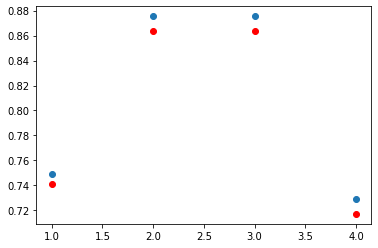

In [14]:
print("Train: \t",buf_loss_train)
print("Test: \t",buf_loss_test)

x = np.linspace(1,4,4)
plt.figure(1)
plt.scatter(x,buf_loss_test, color = "red")
plt.scatter(x,buf_loss_train)
plt.show()

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

In [15]:
buf_loss_test.clear()
buf_loss_train.clear()

In [16]:
print("SGD")
one_dot_five_model = torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Linear(3,1))
train_function(buf_loss_train,
               buf_loss_test,
               one_dot_five_model,
               torch.optim.SGD(one_dot_five_model.parameters(), lr = 0.1))

SGD
Epoch [50/500], Loss: 1.9916
Epoch [100/500], Loss: 0.8756
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


In [17]:
print("SGD with momentum")
train_function(buf_loss_train,
               buf_loss_test,
               one_dot_five_model,
               torch.optim.SGD(one_dot_five_model.parameters(), lr = 0.1, momentum = 0.5))

SGD with momentum
Epoch [50/500], Loss: 0.8755
Epoch [100/500], Loss: 0.8755
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


In [18]:
print("RMSprop")
train_function(buf_loss_train,
               buf_loss_test,
               one_dot_five_model,
               torch.optim.RMSprop(one_dot_five_model.parameters(), lr = 0.1))

RMSprop
Epoch [50/500], Loss: 0.8755
Epoch [100/500], Loss: 0.8755
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8760
Epoch [250/500], Loss: 0.8820
Epoch [300/500], Loss: 0.8800
Epoch [350/500], Loss: 0.8782
Epoch [400/500], Loss: 0.8771
Epoch [450/500], Loss: 0.8767
Epoch [500/500], Loss: 0.8766
tensor(0.8641, grad_fn=<SqrtBackward0>)


In [19]:
print("Adam")
train_function(buf_loss_train,
               buf_loss_test,
               one_dot_five_model)

Adam
Epoch [50/500], Loss: 0.8755
Epoch [100/500], Loss: 0.8755
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8755
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


Train: 	 [0.8755162358283997, 0.8755161762237549, 0.8766021132469177, 0.8755162358283997]
Test: 	 [0.8638489246368408, 0.8638488054275513, 0.8641220331192017, 0.8638487458229065]


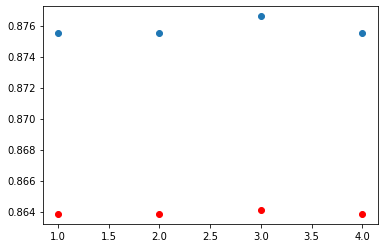

In [20]:
print("Train: \t",buf_loss_train)
print("Test: \t",buf_loss_test)

x = np.linspace(1,4,4)
plt.figure(1)
plt.scatter(x,buf_loss_test, color = "red")
plt.scatter(x,buf_loss_train)
plt.show()

Все алгоритмы оптимизации примерно одинаковые, но RMSprop показывает самые плохие результаты. Для нашей супермодели будем брать `Adam`

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [21]:
buf_loss_test.clear()
buf_loss_train.clear()

In [22]:
print("только BatchNorm")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(9),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(6),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(3),
                                  torch.nn.Linear(3,1)))

только BatchNorm
Epoch [50/500], Loss: 0.7771
Epoch [100/500], Loss: 0.7278
Epoch [150/500], Loss: 0.7166
Epoch [200/500], Loss: 0.7109
Epoch [250/500], Loss: 0.7078
Epoch [300/500], Loss: 0.7067
Epoch [350/500], Loss: 0.7031
Epoch [400/500], Loss: 0.6980
Epoch [450/500], Loss: 0.6970
Epoch [500/500], Loss: 0.6917
tensor(0.7127, grad_fn=<SqrtBackward0>)


In [23]:
print("только Dropout 0.2")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(3,1)))

только Dropout 0.2
Epoch [50/500], Loss: 1.2850
Epoch [100/500], Loss: 0.8812
Epoch [150/500], Loss: 0.8755
Epoch [200/500], Loss: 0.8755
Epoch [250/500], Loss: 0.8755
Epoch [300/500], Loss: 0.8755
Epoch [350/500], Loss: 0.8755
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8754
Epoch [500/500], Loss: 0.8755
tensor(0.8638, grad_fn=<SqrtBackward0>)


In [24]:
print("только Dropout 0.5")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(3,1)))

только Dropout 0.5
Epoch [50/500], Loss: 1.5697
Epoch [100/500], Loss: 0.8770
Epoch [150/500], Loss: 0.8756
Epoch [200/500], Loss: 0.8756
Epoch [250/500], Loss: 0.8759
Epoch [300/500], Loss: 0.8759
Epoch [350/500], Loss: 0.8756
Epoch [400/500], Loss: 0.8755
Epoch [450/500], Loss: 0.8757
Epoch [500/500], Loss: 0.8757
tensor(0.8639, grad_fn=<SqrtBackward0>)


In [25]:
print("BatchNorm + dropout 0.2")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(9),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(6),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(3),
                                  torch.nn.Dropout(0.2),
                                  torch.nn.Linear(3,1)))

BatchNorm + dropout 0.2
Epoch [50/500], Loss: 1.3466
Epoch [100/500], Loss: 0.9681
Epoch [150/500], Loss: 0.7901
Epoch [200/500], Loss: 0.7595
Epoch [250/500], Loss: 0.7599
Epoch [300/500], Loss: 0.7603
Epoch [350/500], Loss: 0.7588
Epoch [400/500], Loss: 0.7533
Epoch [450/500], Loss: 0.7522
Epoch [500/500], Loss: 0.7559
tensor(0.7114, grad_fn=<SqrtBackward0>)


In [26]:
print("BatchNorm + dropout 0.5")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(9),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(6),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(3),
                                  torch.nn.Dropout(0.5),
                                  torch.nn.Linear(3,1)))

BatchNorm + dropout 0.5
Epoch [50/500], Loss: 1.2540
Epoch [100/500], Loss: 0.8733
Epoch [150/500], Loss: 0.8732
Epoch [200/500], Loss: 0.8711
Epoch [250/500], Loss: 0.8673
Epoch [300/500], Loss: 0.8323
Epoch [350/500], Loss: 0.8188
Epoch [400/500], Loss: 0.8067
Epoch [450/500], Loss: 0.8154
Epoch [500/500], Loss: 0.8089
tensor(0.7527, grad_fn=<SqrtBackward0>)


Train: 	 [0.6917358040809631, 0.8755208849906921, 0.8756524324417114, 0.7559115290641785, 0.8089364171028137]
Test: 	 [0.7126978635787964, 0.8637568950653076, 0.8638750314712524, 0.7113890647888184, 0.7526752948760986]


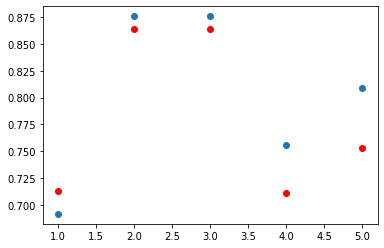

In [27]:
print("Train: \t",buf_loss_train)
print("Test: \t",buf_loss_test)

x = np.linspace(1,5,5)
plt.figure(1)
plt.scatter(x,buf_loss_test, color = "red")
plt.scatter(x,buf_loss_train)
plt.show()

BatchNorm неплохо улучшает модель, возьмем эту конфигурацию

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

In [28]:
buf_loss_test.clear()
buf_loss_train.clear()

In [7]:
print("Финальная модель")
train_function(buf_loss_train,
               buf_loss_test,
               torch.nn.Sequential(torch.nn.Linear(11,9),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(9),
                                  torch.nn.Linear(9,6),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(6),
                                  torch.nn.Linear(6,3),
                                  torch.nn.ReLU(),
                                  torch.nn.BatchNorm1d(3),
                                  torch.nn.Linear(3,1)))

Финальная модель
Epoch [50/500], Loss: 0.7683
Epoch [100/500], Loss: 0.7179
Epoch [150/500], Loss: 0.7128
Epoch [200/500], Loss: 0.7084
Epoch [250/500], Loss: 0.7090
Epoch [300/500], Loss: 0.7059
Epoch [350/500], Loss: 0.7064
Epoch [400/500], Loss: 0.7062
Epoch [450/500], Loss: 0.7061
Epoch [500/500], Loss: 0.7086
tensor(0.6966, grad_fn=<SqrtBackward0>)


In [8]:
print("Train: \t",buf_loss_train)
print("Test: \t",buf_loss_test)


Train: 	 [0.7085692882537842]
Test: 	 [0.6966100335121155]


## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:*

С помощью дополнительных слоев и изменения конфигураций можно неплохо улучшить результаты обучения модели.

*Feedback: отличное задание на эксперименты. Понравилось подставлять разные параметры и смотреть на то, как это изменяется модель. Лучше подобные задания, чем 1.3, 1.4* :cry:

# 2. Искусственная неронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [3]:
df_class = pd.read_csv('train.csv')

In [4]:
df_class_result = df_class[["toxic"]]
df_class_data = df_class[["comment_text"]]

In [15]:
df_class_train_data, df_class_test_data, df_class_train_result, df_class_test_result = learn.train_test_split(df_class_data.comment_text, df_class_result.toxic, train_size=0.8, random_state=42)

## 2.2 По необходимости проведите преодбработку/нормализацию данных

In [66]:
cv = CountVectorizer(max_features=8000, stop_words='english', max_df=0.3, min_df=0.0001)
train_data = cv.fit_transform(df_class_train_data)
test_data = cv.transform(df_class_test_data)
train_data.shape

(127656, 8000)

In [67]:
tensor_train_data = torch.tensor(train_data.toarray())
tensor_train_result = torch.tensor(df_class_train_result.to_numpy())
tensor_test_data = torch.tensor(test_data.toarray())
tensor_test_result = torch.tensor(df_class_test_result.to_numpy())


## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемого количетсва слоёв; 2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [75]:
loss_test_b = []
loss_train_b = []
accuracy_test_b = []
accuracy_train_b = []

def accuracy_calculate(_output, _b_y):
  count = 0
  pred_y = torch.max(_output, 1)[1].data.numpy().squeeze()
  for i in range(len(pred_y)):
    if pred_y[i] == _b_y[i].item():
      count += 1
  return count

def class_train_function(_loss_train_buffer, _loss_test_buffer, _accuracy_train_buffer, _accuracy_test_buffer,
                         _model,
                         _lr = 0.1,
                         _optimizer = torch.optim.Adam,
                         _loss_function = torch.nn.CrossEntropyLoss(),
                         epochs_number = 10):
    train_acc = 0
    if _optimizer == torch.optim.Adam :
            _optimizer = _optimizer(_model.parameters(), _lr)
    for epoch in range(epochs_number):
      b_x = Variable(tensor_train_data)
      b_y = Variable(tensor_train_result)
      _model.train()
      output = _model.forward(b_x.float())
      loss = _loss_function(output, b_y)
      _optimizer.zero_grad()
      loss.backward()
      _optimizer.step()
      if epoch + 1 == epochs_number:
        train_acc += accuracy_calculate(output, b_y)
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs_number, loss.item()))
    _loss_train_buffer.append(loss.item())
    _accuracy_train_buffer.append(train_acc/df_class_train_data.shape[0])

    b_x_test = Variable(tensor_test_data)
    b_y_test = Variable(tensor_test_result)
    _model.eval()
    output = _model.forward(b_x_test.float())
    loss = _loss_function(output, b_y_test)
    _loss_test_buffer.append(loss.item())
    _accuracy_test_buffer.append(accuracy_calculate(output, b_y_test)/df_class_train_data.shape[0])
    pred_y = torch.max(output, 1)[1].data.numpy().squeeze()
    print("F1Score: ",f1_score(b_y_test, pred_y, average='macro'))
    return

In [83]:
print("1 layer")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2)))

1 layer
Epoch [1/10], Loss: 0.6945
Epoch [2/10], Loss: 283.8540
Epoch [3/10], Loss: 384.9760
Epoch [4/10], Loss: 417.3259
Epoch [5/10], Loss: 413.6991
Epoch [6/10], Loss: 387.0613
Epoch [7/10], Loss: 346.3159
Epoch [8/10], Loss: 298.6555
Epoch [9/10], Loss: 250.4975
Epoch [10/10], Loss: 207.6856
F1Score:  0.8180987734512009
Loss: 
Train: 	 [0.3011989891529083, 0.5399401187896729, 0.6743258833885193, 0.6058324575424194, 0.3389526605606079, 1.0482428073883057, 8.412053108215332, 207.68560791015625]
Test: 	 [0.3079233169555664, 0.5317148566246033, 0.6722204089164734, 0.5992403030395508, 0.33938536047935486, 1.2725043296813965, 10.082462310791016, 246.40878295898438]
Accuracy: 
Train: 	 [0.9246647239456038, 0.9121545403271292, 0.6836889766246789, 0.911222347559065, 0.9180297048317353, 0.9462304944538447, 0.9456116437926929, 0.9455959766873473]
Test: 	 [0.23116813937456915, 0.2279563827787178, 0.17516607131666354, 0.22794071567337218, 0.22941342357586011, 0.23509274926364604, 0.234983079526

In [12]:
print("2 layer")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,4000),
                                         torch.nn.ReLU(),
                                         torch.nn.Linear(4000,2)))

2 layer
Epoch [1/10], Loss: 0.6969
Epoch [2/10], Loss: 71.7598
Epoch [3/10], Loss: 6.4705
Epoch [4/10], Loss: 47.8515
Epoch [5/10], Loss: 0.7898
Epoch [6/10], Loss: 0.5791
Epoch [7/10], Loss: 0.4640
Epoch [8/10], Loss: 0.4362
Epoch [9/10], Loss: 0.4103
Epoch [10/10], Loss: 0.3882
F1Score:  0.4748249982177713


In [14]:
print("3 layer")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,5000),
                                         torch.nn.ReLU(),
                                         torch.nn.Linear(5000,2000),
                                         torch.nn.ReLU(),
                                         torch.nn.Linear(2000,2)))

3 layer
Epoch [1/10], Loss: 0.6993
Epoch [2/10], Loss: 8321.8828
Epoch [3/10], Loss: 96.6387
Epoch [4/10], Loss: 0.5900
Epoch [5/10], Loss: 0.5385
Epoch [6/10], Loss: 0.5014
Epoch [7/10], Loss: 0.4647
Epoch [8/10], Loss: 0.4260
Epoch [9/10], Loss: 0.3864
Epoch [10/10], Loss: 0.3445
F1Score:  0.4745031531457363


Как можно заметить - увеличение количества слоев не приносит увеличения качества распознавания.
4-слойная сеть долго обучается( Поэтому просто представим ее код.

In [15]:
 print("4 layer")
 class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                      torch.nn.Sequential(torch.nn.Linear(8000,6000),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(6000,4000),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(4000,2000),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2000,2)))

[0.9448204549727393, 0.9044933258131228, 0.9044541580497587]


Loss: 
Train: 	 [0.330816388130188, 0.3881568908691406, 0.3445436656475067]
Test: 	 [0.37459611892700195, 0.3719739019870758, 0.3862886130809784]
Accuracy: 
Train: 	 [0.9448204549727393, 0.9044933258131228, 0.9044541580497587]
Test: 	 [0.23636178479664097, 0.2257473209249859, 0.2257473209249859]


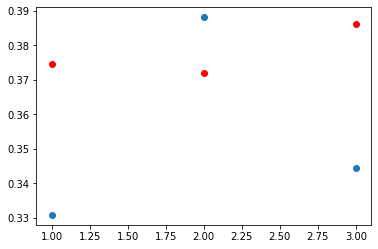

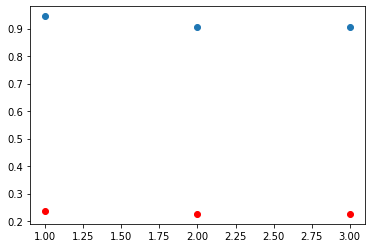

In [21]:
print("Loss: ")
print("Train: \t",loss_train_b)
print("Test: \t",loss_test_b)

print("Accuracy: ")
print("Train: \t",accuracy_train_b)
print("Test: \t",accuracy_test_b)

x = np.linspace(1,3,3)
plt.figure()
plt.scatter(x,loss_train_b)
plt.scatter(x,loss_test_b, color = "red")
plt.show()

plt.figure(2)
plt.scatter(x,accuracy_train_b)
plt.scatter(x,accuracy_test_b, color = "red")
plt.show()

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

In [48]:
loss_test_b.clear()
loss_train_b.clear()
accuracy_test_b.clear()
accuracy_train_b.clear()

print("sigmoid")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2), torch.nn.Sigmoid()))

sigmoid
Epoch [1/10], Loss: 0.6962
Epoch [2/10], Loss: 0.4805
Epoch [3/10], Loss: 0.4411
Epoch [4/10], Loss: 0.4247
Epoch [5/10], Loss: 0.4157
Epoch [6/10], Loss: 0.4101
Epoch [7/10], Loss: 0.4061
Epoch [8/10], Loss: 0.4031
Epoch [9/10], Loss: 0.4007
Epoch [10/10], Loss: 0.3987
F1Score:  0.6155799514765016


In [49]:
print("Tanh")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2), torch.nn.Tanh()))

Tanh
Epoch [1/10], Loss: 0.6926
Epoch [2/10], Loss: 0.3160
Epoch [3/10], Loss: 0.2952
Epoch [4/10], Loss: 0.2882
Epoch [5/10], Loss: 0.2840
Epoch [6/10], Loss: 0.2809
Epoch [7/10], Loss: 0.2783
Epoch [8/10], Loss: 0.2758
Epoch [9/10], Loss: 0.2734
Epoch [10/10], Loss: 0.2711
F1Score:  0.6501431593426537


In [50]:
print("ReLU")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2), torch.nn.ReLU()))

ReLU
Epoch [1/10], Loss: 0.6964
Epoch [2/10], Loss: 0.3725
Epoch [3/10], Loss: 0.3488
Epoch [4/10], Loss: 0.3402
Epoch [5/10], Loss: 0.3266
Epoch [6/10], Loss: 0.3061
Epoch [7/10], Loss: 0.2812
Epoch [8/10], Loss: 0.2552
Epoch [9/10], Loss: 0.2320
Epoch [10/10], Loss: 0.2141
F1Score:  0.6043709890352582


In [51]:
print("ELU")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2), torch.nn.ELU()))

ELU
Epoch [1/10], Loss: 0.6989
Epoch [2/10], Loss: 0.3383
Epoch [3/10], Loss: 0.3508
Epoch [4/10], Loss: 0.3618
Epoch [5/10], Loss: 0.3622
Epoch [6/10], Loss: 0.3529
Epoch [7/10], Loss: 0.3364
Epoch [8/10], Loss: 0.3145
Epoch [9/10], Loss: 0.2896
Epoch [10/10], Loss: 0.2635
F1Score:  0.7124960463934


Loss: 
Train: 	 [0.39868712425231934, 0.27109694480895996, 0.21411405503749847, 0.26347437500953674]
Test: 	 [0.398738294839859, 0.27279824018478394, 0.22543519735336304, 0.2591093182563782]
Accuracy: 
Train: 	 [0.9195964153662969, 0.9234661903866641, 0.9178260324622423, 0.9314094127968916]
Test: 	 [0.22978943410415492, 0.2308156295042928, 0.22943692423387854, 0.23296202293664223]


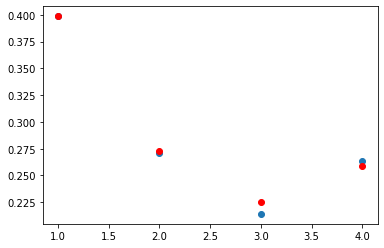

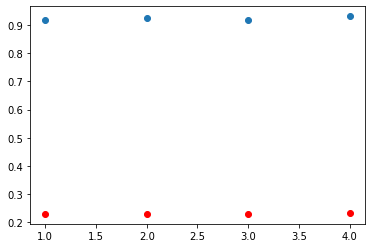

In [53]:
print("Loss: ")
print("Train: \t",loss_train_b)
print("Test: \t",loss_test_b)

print("Accuracy: ")
print("Train: \t",accuracy_train_b)
print("Test: \t",accuracy_test_b)

x = np.linspace(1,4,4)
plt.figure()
plt.scatter(x,loss_train_b)
plt.scatter(x,loss_test_b, color = "red")
plt.show()

plt.figure(2)
plt.scatter(x,accuracy_train_b)
plt.scatter(x,accuracy_test_b, color = "red")
plt.show()

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

In [72]:
loss_test_b.clear()
loss_train_b.clear()
accuracy_test_b.clear()
accuracy_train_b.clear()

two_dot_five_model = torch.nn.Sequential(torch.nn.Linear(8000,2), torch.nn.ELU())

print("SGD")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     two_dot_five_model,
                     _optimizer = torch.optim.SGD(two_dot_five_model.parameters(), lr = 0.1))

print("SGD with momentum")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     two_dot_five_model,
                     _optimizer = torch.optim.SGD(two_dot_five_model.parameters(), lr = 0.1, momentum=0.5))

print("RMSprop")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     two_dot_five_model,
                     _optimizer = torch.optim.RMSprop(two_dot_five_model.parameters(), lr = 0.1))
print("Adam")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     two_dot_five_model)

SGD
Epoch [1/10], Loss: 0.6984
Epoch [2/10], Loss: 0.6340
Epoch [3/10], Loss: 0.5887
Epoch [4/10], Loss: 0.5548
Epoch [5/10], Loss: 0.5279
Epoch [6/10], Loss: 0.5059
Epoch [7/10], Loss: 0.4874
Epoch [8/10], Loss: 0.4715
Epoch [9/10], Loss: 0.4578
Epoch [10/10], Loss: 0.4458
F1Score:  0.48448469323298377
SGD with momentum
Epoch [1/10], Loss: 0.4352
Epoch [2/10], Loss: 0.4257
Epoch [3/10], Loss: 0.4129
Epoch [4/10], Loss: 0.3999
Epoch [5/10], Loss: 0.3881
Epoch [6/10], Loss: 0.3776
Epoch [7/10], Loss: 0.3686
Epoch [8/10], Loss: 0.3609
Epoch [9/10], Loss: 0.3542
Epoch [10/10], Loss: 0.3484
F1Score:  0.48481351227496694
RMSprop
Epoch [1/10], Loss: 0.3434
Epoch [2/10], Loss: 0.9830
Epoch [3/10], Loss: 0.2324
Epoch [4/10], Loss: 0.1754
Epoch [5/10], Loss: 0.1595
Epoch [6/10], Loss: 0.1484
Epoch [7/10], Loss: 0.1397
Epoch [8/10], Loss: 0.1325
Epoch [9/10], Loss: 0.1266
Epoch [10/10], Loss: 0.1224
F1Score:  0.7919868228558959
RMSprop
Epoch [1/10], Loss: 0.1187
Epoch [2/10], Loss: 0.1213
Epoch 

Loss: 
Train: 	 [0.7009029388427734, 0.6911267042160034, 0.6968640685081482, 0.3244816064834595]
Test: 	 [0.7004945278167725, 0.6908811926841736, 0.6966554522514343, 0.36461859941482544]
Accuracy: 
Train: 	 [0.3571003321426333, 0.5633186062543084, 0.48535909005452155, 0.9452904681331077]
Test: 	 [0.0898195149464185, 0.13950773955004073, 0.11964968352447201, 0.23586827097825405]


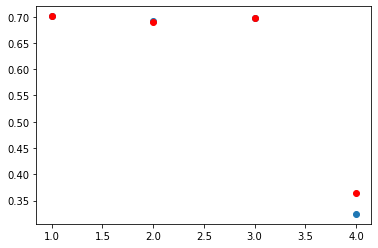

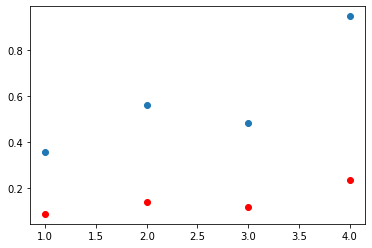

In [71]:
print("Loss: ")
print("Train: \t",loss_train_b)
print("Test: \t",loss_test_b)

print("Accuracy: ")
print("Train: \t",accuracy_train_b)
print("Test: \t",accuracy_test_b)

x = np.linspace(1,4,4)
plt.figure()
plt.scatter(x,loss_train_b)
plt.scatter(x,loss_test_b, color = "red")
plt.show()

plt.figure(2)
plt.scatter(x,accuracy_train_b)
plt.scatter(x,accuracy_test_b, color = "red")
plt.show()

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 1) график loss для train и test в зависимости от используемой конфигурации; 2) график accuracy для train и test в зависимости от используемой конфигурации.

In [73]:
loss_test_b.clear()
loss_train_b.clear()
accuracy_test_b.clear()
accuracy_train_b.clear()

print("BatchNorm")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.BatchNorm1d(2),
                                         torch.nn.ELU()))
print("dropout 0.2")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.Dropout(0.2),
                                         torch.nn.ELU()))
print("dropout 0.5")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.Dropout(0.5),
                                         torch.nn.ELU()))
print("BatchNorm + dropout 0.2")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.BatchNorm1d(2),
                                         torch.nn.Dropout(0.2),
                                         torch.nn.ELU()))
print("BatchNorm + dropout 0.5")
class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.BatchNorm1d(2),
                                         torch.nn.Dropout(0.5),
                                         torch.nn.ELU()))

BatchNorm
Epoch [1/10], Loss: 0.7227
Epoch [2/10], Loss: 0.6124
Epoch [3/10], Loss: 0.5445
Epoch [4/10], Loss: 0.4908
Epoch [5/10], Loss: 0.4486
Epoch [6/10], Loss: 0.4155
Epoch [7/10], Loss: 0.3894
Epoch [8/10], Loss: 0.3687
Epoch [9/10], Loss: 0.3520
Epoch [10/10], Loss: 0.3381
F1Score:  0.5395189621880883
dropout 0.2
Epoch [1/10], Loss: 0.7069
Epoch [2/10], Loss: 0.3802
Epoch [3/10], Loss: 0.4014
Epoch [4/10], Loss: 0.4146
Epoch [5/10], Loss: 0.4128
Epoch [6/10], Loss: 0.4032
Epoch [7/10], Loss: 0.3842
Epoch [8/10], Loss: 0.3602
Epoch [9/10], Loss: 0.3340
Epoch [10/10], Loss: 0.3094
F1Score:  0.7111043740803172
dropout 0.5
Epoch [1/10], Loss: 0.7029
Epoch [2/10], Loss: 0.4963
Epoch [3/10], Loss: 0.5225
Epoch [4/10], Loss: 0.5335
Epoch [5/10], Loss: 0.5388
Epoch [6/10], Loss: 0.5136
Epoch [7/10], Loss: 0.5119
Epoch [8/10], Loss: 0.4834
Epoch [9/10], Loss: 0.4561
Epoch [10/10], Loss: 0.4307
F1Score:  0.7091689933252613
BatchNorm + dropout 0.2
Epoch [1/10], Loss: 0.7235
Epoch [2/10], L

Loss: 
Train: 	 [0.3380804657936096, 0.30941447615623474, 0.4306885004043579, 0.4139946401119232, 0.46392545104026794]
Test: 	 [0.3410969078540802, 0.24954047799110413, 0.23795028030872345, 0.42708295583724976, 0.38104012608528137]
Accuracy: 
Train: 	 [0.880593156608385, 0.9308845647678134, 0.9252914081594285, 0.8626934887510184, 0.8862646487434982]
Test: 	 [0.216433226797017, 0.23290718806793256, 0.2328523531992229, 0.20570125963526978, 0.21839944851789184]


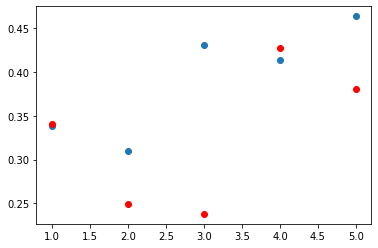

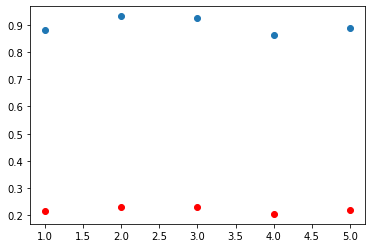

In [74]:
print("Loss: ")
print("Train: \t",loss_train_b)
print("Test: \t",loss_test_b)

print("Accuracy: ")
print("Train: \t",accuracy_train_b)
print("Test: \t",accuracy_test_b)

x = np.linspace(1,5,5)
plt.figure()
plt.scatter(x,loss_train_b)
plt.scatter(x,loss_test_b, color = "red")
plt.show()

plt.figure(2)
plt.scatter(x,accuracy_train_b)
plt.scatter(x,accuracy_test_b, color = "red")
plt.show()


## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

Самые лучшие резульаты показали:
Adam, Dropout(0.2), ELU(), 1 слой

In [85]:
loss_test_b.clear()
loss_train_b.clear()
accuracy_test_b.clear()
accuracy_train_b.clear()


class_train_function(loss_train_b, loss_test_b, accuracy_train_b, accuracy_test_b,
                     torch.nn.Sequential(torch.nn.Linear(8000,2),
                                         torch.nn.Dropout(0.2),
                                         torch.nn.ELU()))
print("Loss: ")
print("Train: \t",loss_train_b)
print("Test: \t",loss_test_b)

print("Accuracy: ")
print("Train: \t",accuracy_train_b)
print("Test: \t",accuracy_test_b)

Epoch [1/10], Loss: 0.7036
Epoch [2/10], Loss: 0.3845
Epoch [3/10], Loss: 0.4060
Epoch [4/10], Loss: 0.4230
Epoch [5/10], Loss: 0.4180
Epoch [6/10], Loss: 0.4055
Epoch [7/10], Loss: 0.3860
Epoch [8/10], Loss: 0.3657
Epoch [9/10], Loss: 0.3387
Epoch [10/10], Loss: 0.3159
F1Score:  0.7046097507237373
Loss: 
Train: 	 [0.31593412160873413]
Test: 	 [0.2548350989818573]
Accuracy: 
Train: 	 [0.9301325437112239]
Test: 	 [0.2326643479350755]


## 2.8 Выводы

С этой частью не повезло - для обработки текста через PyTorch требовалось перевести bag-of-word в тензоры,
а сделать это можно только с маленьким количеством слов(на большее количество мой компьютер просто ругался: не хотел отдавать 10+GB SSD).
Косвенно это подтверждают эксперименты с данными - какие бы параметры `max_df`,`min_df` не были бы взяты - точность обучения была высокой, а точность на тестовых данных - низкая.

Из этого задания можно сделать выводы, что классификация больших текстовых данных требует и много памяти, и большую вычислительную мощность.

А по общей работе выводы следующие - можно настраивать параметры сети для баланса между временем обучения и точностью, а использование других функций актвации и оптимизаторов может помочь повысить точность, не жертвуя скоростью.